In [122]:
# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, levene
from itertools import combinations
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
# Import the data

In [2]:
# world bank dataset
world_bank = pd.read_csv("../additional_material/world_bank_development_indicators.csv")

# income dataset
income_data = pd.ExcelFile("../additional_material/income.xlsx")

In [3]:
 income_data.sheet_names

['List of economies', 'composition', 'notes']

In [4]:
# only reading first sheet in excel file
economy_income = pd.read_excel(income_data, sheet_name='List of economies')
economy_income

,Economy,Code,Region,Income group,Lending category
0,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA
1,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
2,Algeria,DZA,"Middle East, North Africa, Afghanistan & Pakistan",Upper middle income,IBRD
3,American Samoa,ASM,East Asia & Pacific,High income,NaN
4,Andorra,AND,Europe & Central Asia,High income,NaN
...,...,...,...,...,...
262,Sub-Saharan Africa,SSF,NaN,NaN,NaN
263,Sub-Saharan Africa (excluding high income),SSA,NaN,NaN,NaN
264,Sub-Saharan Africa (IDA & IBRD),TSS,NaN,NaN,NaN
265,Upper middle income,UMC,NaN,NaN,NaN


In [5]:
# Add income/region information by merging the tables into a single dataframe.

world_bank = world_bank.merge(economy_income[['Economy', 'Income group', 'Region']], 
                       how='left', 
                       left_on='country', 
                       right_on='Economy').drop(columns=['Economy'])

In [6]:
world_bank.sample(10)

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,Income group,Region
15199,Sweden,1997-01-01,8.000693,69.065205,4.073397e+05,624.0,13.623613,NaN,NaN,100.000000,...,10.200000,10.600000,79.197561,8846062.0,1420501.0,NaN,NaN,0.987753,High income,Europe & Central Asia
15677,Tonga,1963-01-01,40.277778,NaN,7.200000e+02,NaN,NaN,NaN,NaN,NaN,...,43.282000,9.725000,59.551000,73441.0,59707.0,NaN,NaN,NaN,Upper middle income,East Asia & Pacific
2016,Brunei Darussalam,1992-01-01,2.466793,77.760911,5.270000e+03,2722.0,NaN,NaN,NaN,100.000000,...,26.759000,3.756000,72.081000,277416.0,91331.0,NaN,NaN,NaN,High income,East Asia & Pacific
6373,Guyana,1968-01-01,6.944233,NaN,1.967100e+05,2387.0,NaN,NaN,NaN,NaN,...,37.057000,9.176000,60.256000,685887.0,484723.0,NaN,NaN,NaN,High income,Latin America & Caribbean
530,Antigua and Barbuda,1978-01-01,20.454545,NaN,4.400000e+02,1030.0,41.546865,NaN,NaN,NaN,...,23.135000,6.129000,72.871000,64329.0,42163.0,NaN,NaN,NaN,High income,Latin America & Caribbean
13699,Sierra Leone,2000-01-01,38.930452,40.585065,7.218000e+04,2526.0,24.390844,-0.736802,0.329849,7.728399,...,44.991000,19.794000,45.050000,4584067.0,2950947.0,-1.335190,0.221949,NaN,Low income,Sub-Saharan Africa
5399,Fragile and conflict affected situations,2018-01-01,36.722624,23.279305,2.045436e+07,NaN,13.254747,NaN,NaN,54.586644,...,33.131606,9.198789,61.971353,936721531.0,533580118.0,NaN,NaN,NaN,NaN,NaN
9519,Luxembourg,2011-01-01,50.989334,34.453827,2.574460e+03,934.0,196.753822,2.153153,0.196326,100.000000,...,10.900000,7.400000,80.987805,518347.0,57505.0,1.604539,0.161986,0.771894,High income,Europe & Central Asia
6521,Heavily indebted poor countries (HIPC),1988-01-01,36.701802,NaN,1.975319e+07,NaN,9.630860,NaN,NaN,NaN,...,46.425882,17.568773,48.106389,339527267.0,256144790.0,NaN,NaN,NaN,NaN,NaN
16443,United States,1994-01-01,45.981094,33.069737,9.158960e+06,715.0,4.576083,NaN,NaN,100.000000,...,15.000000,8.800000,75.619512,263126000.0,60847887.0,NaN,NaN,8.893766,High income,North America


In [7]:
world_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17272 entries, 0 to 17271
Data columns (total 52 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    17272 non-null  object 
 1   date                                       17272 non-null  object 
 2   agricultural_land%                         14714 non-null  float64
 3   forest_land%                               8176 non-null   float64
 4   land_area                                  14930 non-null  float64
 5   avg_precipitation                          10086 non-null  float64
 6   trade_in_services%                         9195 non-null   float64
 7   control_of_corruption_estimate             4783 non-null   float64
 8   control_of_corruption_std                  4783 non-null   float64
 9   access_to_electricity%                     7348 non-null   float64
 10  renewvable_energy_cons

In [8]:
# dataset column name notaions struture
world_bank.columns = (
    world_bank.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
    .str.replace(r"[^a-z0-9_]", "", regex=True)
)
world_bank.head()

,country,date,agricultural_land,forest_land,land_area,avg_precipitation,trade_in_services,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity,...,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,income_group,region
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan"
1,Afghanistan,1961-01-01,57.878356,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan"
2,Afghanistan,1962-01-01,57.955016,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan"
3,Afghanistan,1963-01-01,58.031676,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan"
4,Afghanistan,1964-01-01,58.116002,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan"


In [ ]:
# Clean up countries

In [9]:
world_bank['country'].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Czechia', 'Denmark', 'Djibouti', 'Dominica'

In [10]:
# removing empty rows from income_grop
world_bank = world_bank.dropna(subset=['income_group'])
world_bank.shape

(13343, 52)

In [11]:
# unique values in life life_expectancy_at_birth
world_bank['life_expectancy_at_birth'].unique()

array([32.535, 33.068, 33.547, ..., 61.414, 61.124, 59.253],
      shape=(11082,))

In [12]:
# checking null values
world_bank['life_expectancy_at_birth'].isnull().sum()

np.int64(1006)

In [13]:
# droping nan values from life_expectancy_at_birth
world_bank = world_bank.dropna(subset=['life_expectancy_at_birth'])
world_bank.shape

(12337, 52)

In [14]:
# checking duplicates
world_bank.duplicated().sum()

np.int64(0)

In [ ]:
# Some basic initial inspections

In [15]:
# display the first, the last and a random sample of 7 entries
world_bank.head(1), world_bank.tail(1), world_bank.sample(7)

(       country        date  agricultural_land  forest_land  land_area  \
 0  Afghanistan  1960-01-01                NaN          NaN        NaN   
 
    avg_precipitation  trade_in_services  control_of_corruption_estimate  \
 0                NaN                NaN                             NaN   
 
    control_of_corruption_std  access_to_electricity  ...  birth_rate  \
 0                        NaN                    NaN  ...       50.34   
 
    death_rate  life_expectancy_at_birth  population  rural_population  \
 0      31.921                    32.535   8622466.0         7898093.0   
 
    voice_and_accountability_estimate  voice_and_accountability_std  \
 0                                NaN                           NaN   
 
    intentional_homicides  income_group  \
 0                    NaN    Low income   
 
                                               region  
 0  Middle East, North Africa, Afghanistan & Pakistan  
 
 [1 rows x 52 columns],
         country        date

In [16]:
# check data types
world_bank.dtypes

country                                      object
date                                         object
agricultural_land                           float64
forest_land                                 float64
land_area                                   float64
avg_precipitation                           float64
trade_in_services                           float64
control_of_corruption_estimate              float64
control_of_corruption_std                   float64
access_to_electricity                       float64
renewvable_energy_consumption               float64
electric_power_consumption                  float64
co2_emisions                                float64
other_greenhouse_emisions                   float64
population_density                          float64
inflation_annual                            float64
real_interest_rate                          float64
risk_premium_on_lending                     float64
research_and_development_expenditure        float64
central_gove

In [17]:
# check missing values
world_bank.isna().sum()

country                                         0
date                                            0
agricultural_land                            1465
forest_land                                  6166
land_area                                    1321
avg_precipitation                            2750
trade_in_services                            5668
control_of_corruption_estimate               8034
control_of_corruption_std                    8034
access_to_electricity                        6661
renewvable_energy_consumption                6190
electric_power_consumption                   6709
co2_emisions                                 6696
other_greenhouse_emisions                    6696
population_density                           1321
inflation_annual                             4244
real_interest_rate                           8164
risk_premium_on_lending                     10056
research_and_development_expenditure        10158
central_goverment_debt                      10571


In [18]:
# checking duplicates values
world_bank.duplicated().sum()

np.int64(0)

In [19]:
# basic summary statistics for both categorical
#getting statistics on categorical/object columns
obj_cols = world_bank.select_dtypes(include='object').columns
print(f"This dataset has {len(obj_cols)} object columns:", list(obj_cols))

This dataset has 4 object columns: ['country', 'date', 'income_group', 'region']


In [20]:
#detailed statistics on object data
for col in world_bank.select_dtypes(include='object'):
    print(f"\nColumn: {col}")
    print("Count of non-null values:", world_bank[col].count()) 
    print("Number of unique values:", world_bank[col].nunique())
    print("Most frequent value:", world_bank[col].value_counts().idxmax())
    print("Most frequent value (frequency):", world_bank[col].value_counts().max())
    print("Least frequent value:", world_bank[col].value_counts().idxmin())
    print("Least frequent value (frequency):", world_bank[col].value_counts().min())


Column: country
Count of non-null values: 12337
Number of unique values: 203
Most frequent value: Afghanistan
Most frequent value (frequency): 62
Least frequent value: Cayman Islands
Least frequent value (frequency): 1

Column: date
Count of non-null values: 12337
Number of unique values: 62
Most frequent value: 1995-01-01
Most frequent value (frequency): 202
Least frequent value: 1965-01-01
Least frequent value (frequency): 195

Column: income_group
Count of non-null values: 12337
Number of unique values: 4
Most frequent value: High income
Most frequent value (frequency): 4679
Least frequent value: Low income
Least frequent value (frequency): 1488

Column: region
Count of non-null values: 12337
Number of unique values: 7
Most frequent value: Europe & Central Asia
Most frequent value (frequency): 3272
Least frequent value: North America
Least frequent value (frequency): 186


In [21]:
# numerical variables
world_bank.describe()

,agricultural_land,forest_land,land_area,avg_precipitation,trade_in_services,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity,renewvable_energy_consumption,electric_power_consumption,...,multidimensional_poverty_headcount_ratio,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
count,10872.000000,6171.000000,1.101600e+04,9587.000000,6669.000000,4303.000000,4303.000000,5676.000000,6147.000000,5628.000000,...,433.000000,2032.000000,12315.000000,12320.000000,12337.000000,1.233700e+04,1.221300e+04,4338.000000,4338.000000,3761.000000
mean,36.859765,32.024224,6.333164e+05,1197.780640,23.638020,-0.022664,0.199437,80.971078,30.652775,3253.943467,...,26.855810,37.704429,27.899943,10.359263,64.841867,2.575121e+07,1.405247e+07,-0.024143,0.164513,7.858061
std,22.429526,24.656054,1.700936e+06,801.397558,25.049107,1.002276,0.080858,29.641385,30.384863,4510.362635,...,10.706123,8.897723,13.043383,5.546529,11.264059,1.077548e+08,7.130716e+07,0.991458,0.059423,12.187223
min,0.262821,0.000000,1.000000e+01,18.100000,0.621025,-1.936706,0.114062,0.533899,0.000000,5.548906,...,2.370000,20.700000,5.000000,0.795000,11.995000,2.646000e+03,0.000000e+00,-2.313395,0.103012,0.000000
25%,17.769203,10.882353,1.487000e+04,589.000000,9.821090,-0.799936,0.147376,70.463633,3.725000,442.235588,...,18.500000,31.100000,16.000000,6.800000,57.947000,6.636530e+05,2.973540e+05,-0.828785,0.126784,1.273807
50%,37.647385,30.270000,1.074000e+05,1083.000000,16.197962,-0.257588,0.172068,99.093647,19.780000,1637.804168,...,24.800000,35.500000,26.467000,9.070500,67.661780,4.440300e+06,1.973563e+06,0.008879,0.142200,3.056778
75%,54.710446,50.851685,4.727100e+05,1732.000000,27.779357,0.666760,0.221240,100.000000,53.015000,4399.794384,...,32.600000,43.000000,39.642000,12.243000,73.080000,1.348335e+07,7.284867e+06,0.855610,0.189655,9.010965
max,93.440750,98.574551,1.638995e+07,3240.000000,327.166162,2.459118,0.942502,100.000000,98.340000,54799.174708,...,74.200000,65.800000,58.121000,103.534000,85.497561,1.412360e+09,9.093848e+08,1.800992,0.578548,138.773986


In [22]:
# correlation
world_bank.corr(numeric_only=True)

,agricultural_land,forest_land,land_area,avg_precipitation,trade_in_services,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity,renewvable_energy_consumption,electric_power_consumption,...,multidimensional_poverty_headcount_ratio,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
agricultural_land,1.000000,-0.458758,0.001600,-0.297814,-0.187452,-0.209995,-0.216473,-0.133978,0.080677,-0.263808,...,0.220813,-0.079463,-0.030196,0.119528,-0.046757,0.114777,0.110529,-0.133629,-0.196474,0.004053
forest_land,-0.458758,1.000000,-0.002582,0.659278,-0.035680,0.028293,0.075231,-0.080257,0.223300,-0.084089,...,0.027267,0.290046,0.022660,0.089553,-0.068246,-0.037719,-0.051540,0.173784,0.078603,0.213048
land_area,0.001600,-0.002582,1.000000,-0.171256,-0.215777,-0.020428,-0.165377,0.048991,-0.045525,0.123749,...,0.093548,0.116132,-0.061581,0.003962,0.020022,0.487176,0.399269,-0.049622,-0.118469,0.055874
avg_precipitation,-0.297814,0.659278,-0.171256,1.000000,0.099198,0.005827,0.196425,-0.089262,0.264676,-0.131218,...,-0.016288,0.455183,0.042636,-0.064898,-0.028366,-0.047990,-0.034405,0.153404,0.167353,0.293777
trade_in_services,-0.187452,-0.035680,-0.215777,0.099198,1.000000,0.310761,0.245798,0.190644,-0.269485,0.181370,...,-0.183899,-0.201748,-0.199778,-0.168794,0.238526,-0.154641,-0.130459,0.276768,0.271775,-0.081243
control_of_corruption_estimate,-0.209995,0.028293,-0.020428,0.005827,0.310761,1.000000,0.082057,0.476000,-0.371562,0.655920,...,-0.687146,-0.382237,-0.597499,-0.120580,0.634413,-0.062522,-0.094646,0.768894,0.217395,-0.210301
control_of_corruption_std,-0.216473,0.075231,-0.165377,0.196425,0.245798,0.082057,1.000000,-0.055077,-0.063791,-0.047255,...,-0.002941,0.160347,0.154964,-0.040442,-0.149225,-0.148568,-0.119533,0.080121,0.787512,0.131347
access_to_electricity,-0.133978,-0.080257,0.048991,-0.089262,0.190644,0.476000,-0.055077,1.000000,-0.782931,0.414108,...,-0.413151,-0.326280,-0.829276,-0.408610,0.832060,0.021407,-0.027474,0.395380,0.084363,-0.073030
renewvable_energy_consumption,0.080677,0.223300,-0.045525,0.264676,-0.269485,-0.371562,-0.063791,-0.782931,1.000000,-0.264196,...,0.066159,0.315903,0.669641,0.438080,-0.676926,0.003455,0.045177,-0.280414,-0.184734,0.074574
electric_power_consumption,-0.263808,-0.084089,0.123749,-0.131218,0.181370,0.655920,-0.047255,0.414108,-0.264196,1.000000,...,-0.488156,-0.440925,-0.494273,-0.212395,0.547881,-0.063650,-0.101133,0.435134,0.111487,-0.250662


In [23]:
# chi square finding relations in object columns
# categorical_cols = ['country', 'date', 'income_group', 'region']


def chi_test(world_bank, col1, col2):
    table = pd.crosstab(world_bank[col1], world_bank[col2])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"{col1}  vs  {col2}  →  p-value = {p}")
    

# run chi-square for every pair => used obj_cols from basic summary statistics for both categorical from above code 
for col1, col2 in combinations(obj_cols, 2): 
    chi_test(world_bank, col1, col2)

country  vs  date  →  p-value = 1.0
country  vs  income_group  →  p-value = 0.0
country  vs  region  →  p-value = 0.0
date  vs  income_group  →  p-value = 1.0
date  vs  region  →  p-value = 1.0
income_group  vs  region  →  p-value = 0.0


In [56]:
# basic plots for categorical and numerical variables to check distributions and counts (histogram, barplot)

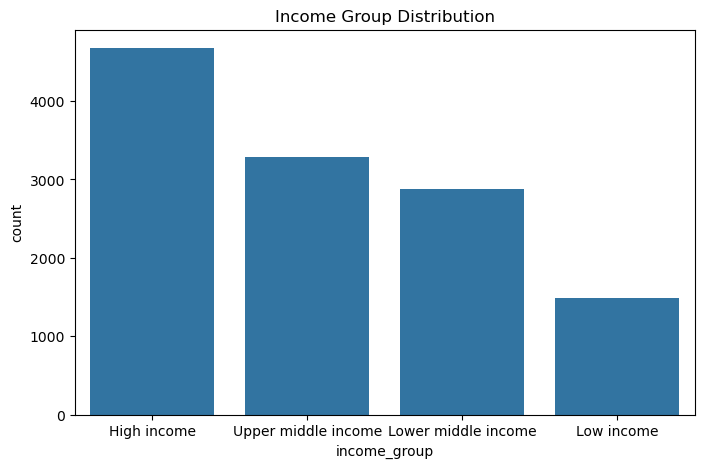

In [24]:
# checking how many times each income_group appears.
plt.figure(figsize=(8,5))
sns.countplot(data=world_bank, x='income_group', order=world_bank['income_group'].value_counts().index)
plt.title("Income Group Distribution")
plt.show()

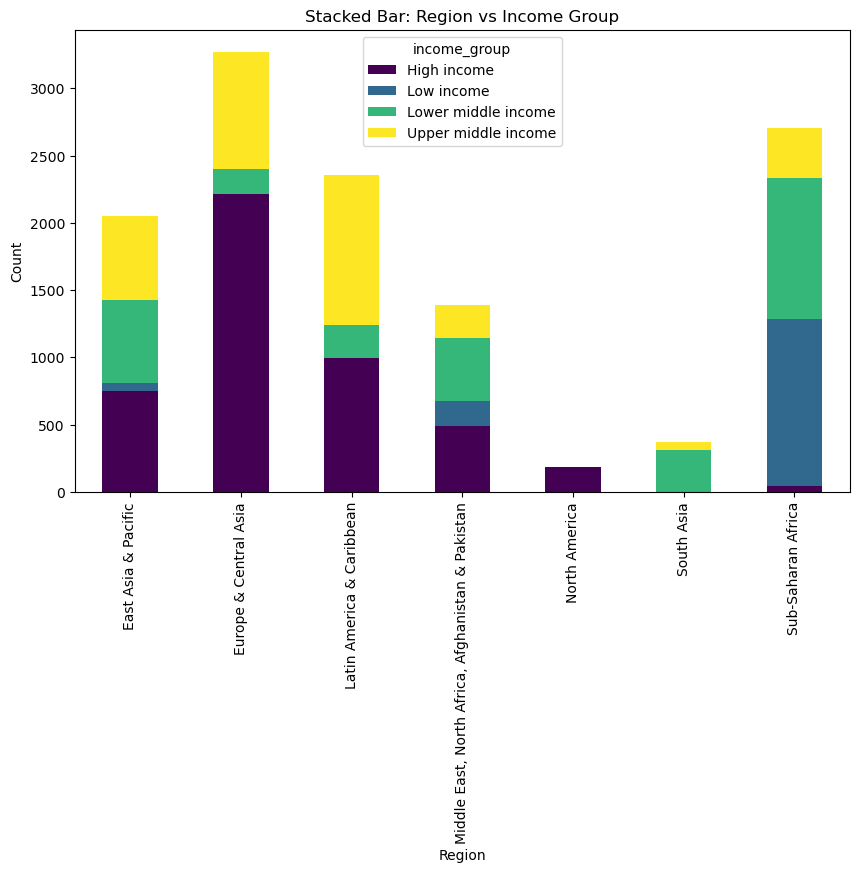

In [25]:
# region and income group => how income groups are distributed within each region.
ct = pd.crosstab(world_bank['region'], world_bank['income_group'])

ct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title("Stacked Bar: Region vs Income Group")
# x-axis => region
plt.xlabel("Region") 
# Y-axis => number of countries in that region.
plt.ylabel("Count")
plt.show()

<Figure size 1200x600 with 0 Axes>

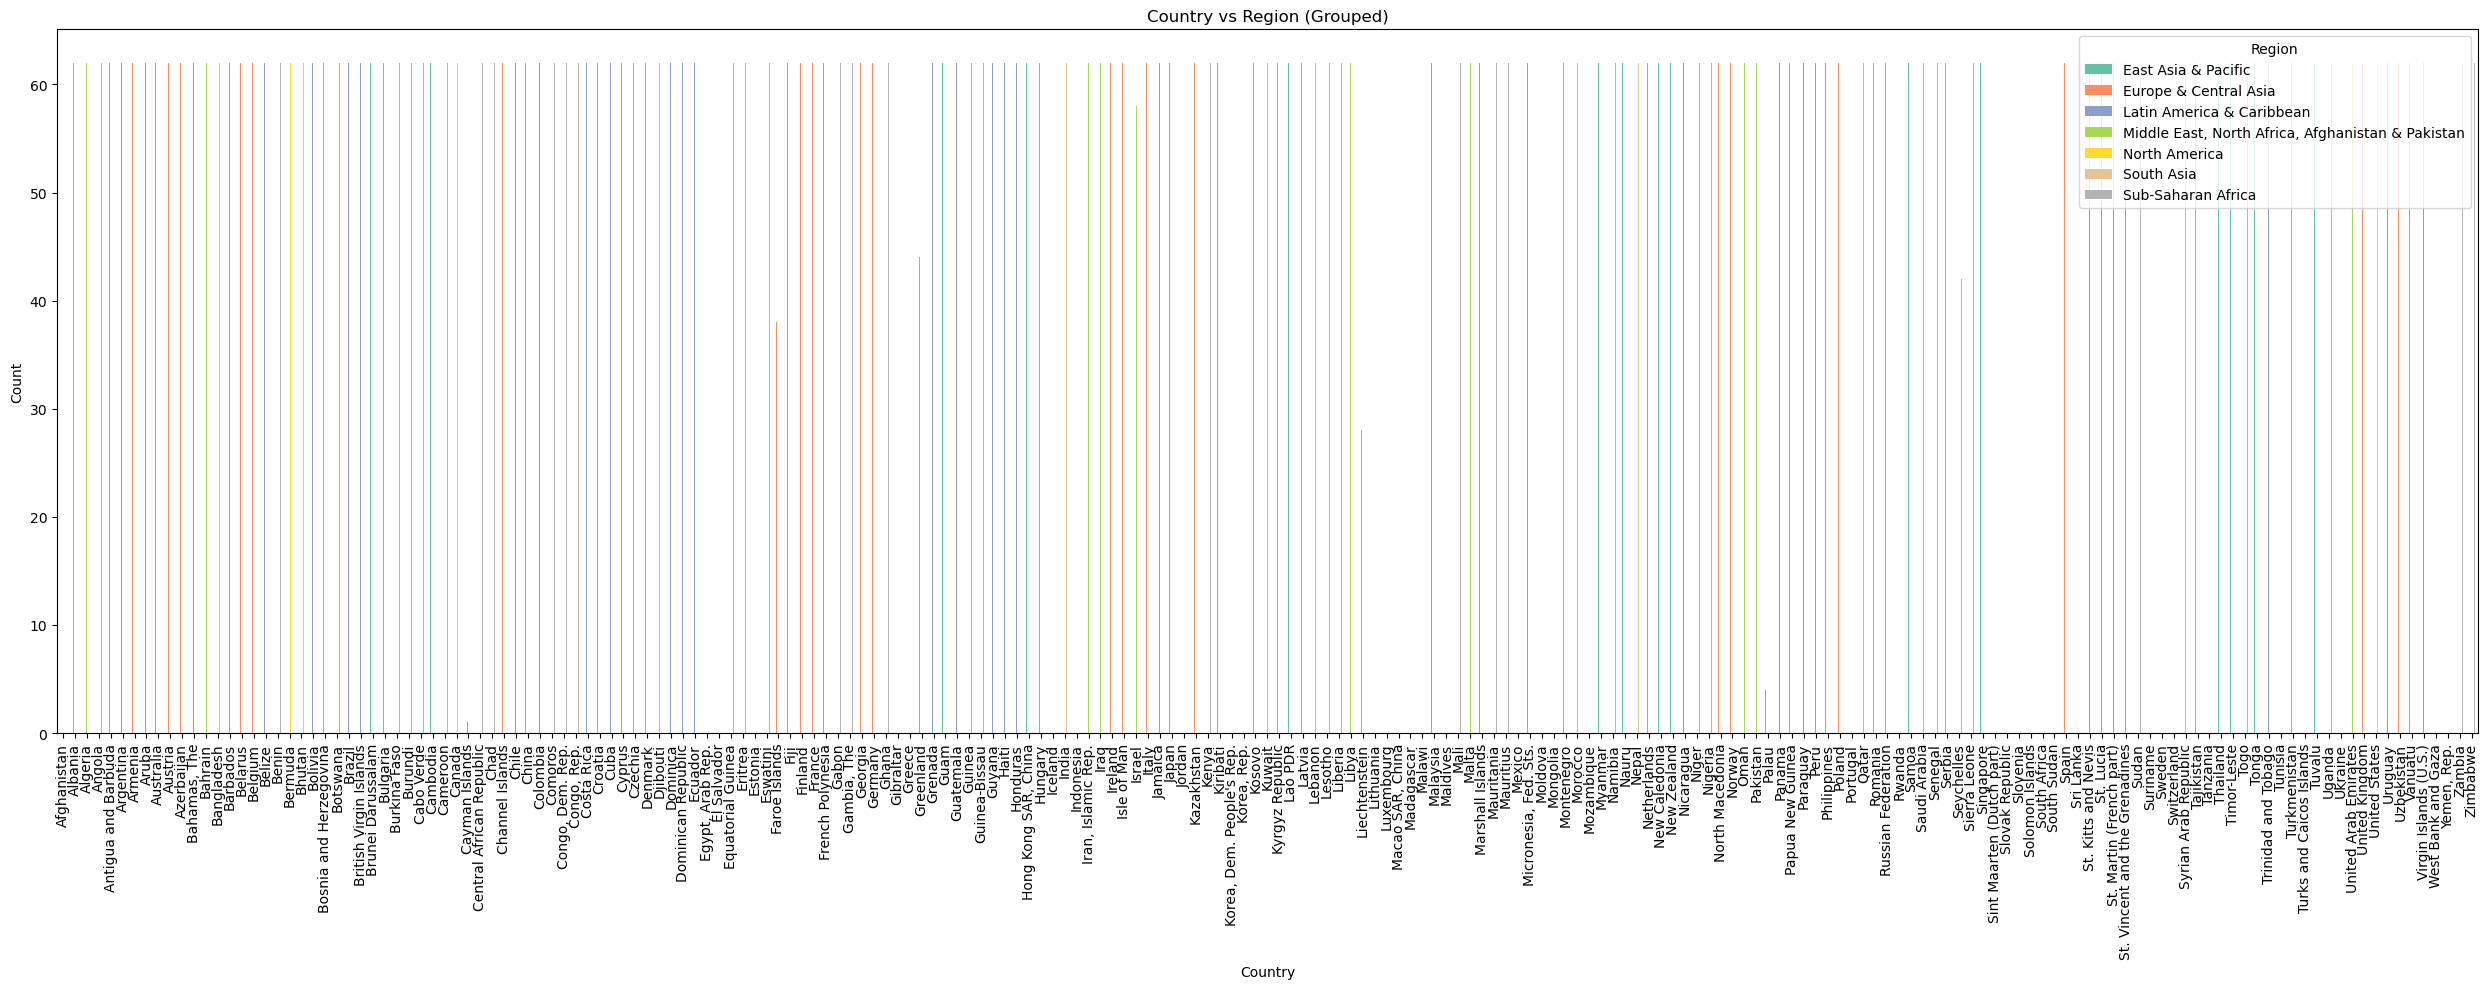

In [26]:
# This grouped bar chart shows which region each country belongs to.
plt.figure(figsize=(12,6))
region_country = pd.crosstab(world_bank['country'], world_bank['region'])
region_country.plot(kind='bar', stacked=False, colormap='Set2', figsize=(25,10))
plt.title('Country vs Region (Grouped)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

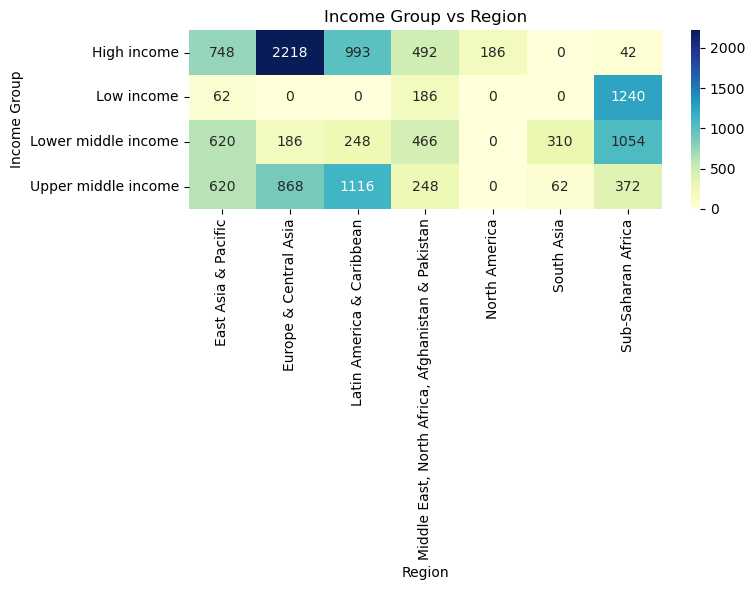

In [27]:
# The heatmap highlights the distribution of income groups across regions.
plt.figure(figsize=(8,6))
income_region = pd.crosstab(world_bank['income_group'], world_bank['region'])
sns.heatmap(income_region, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Income Group vs Region')
plt.xlabel('Region')
plt.ylabel('Income Group')
plt.tight_layout()
plt.show()

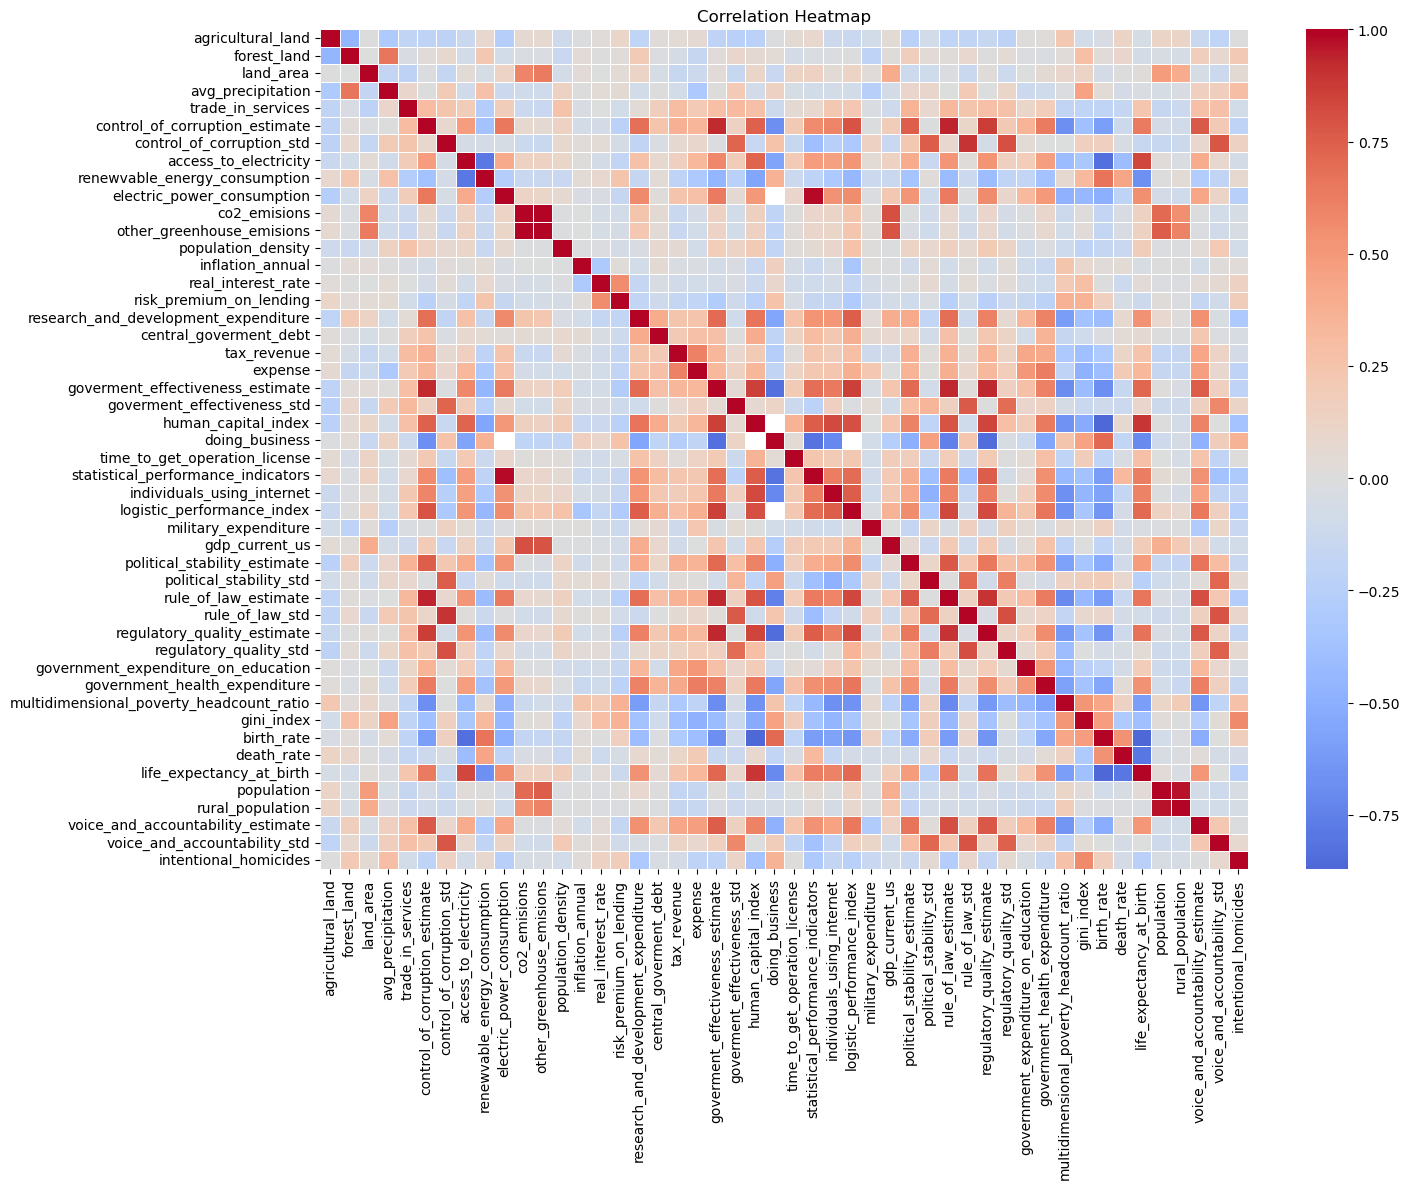

In [28]:
# Correlation heatmap (all variables) => Red indicates strong positive correlation, blue indicates strong negative correlation.
# The heatmap shows pairwise correlations between all numeric variables.
plt.figure(figsize=(15,12))
corr = world_bank.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

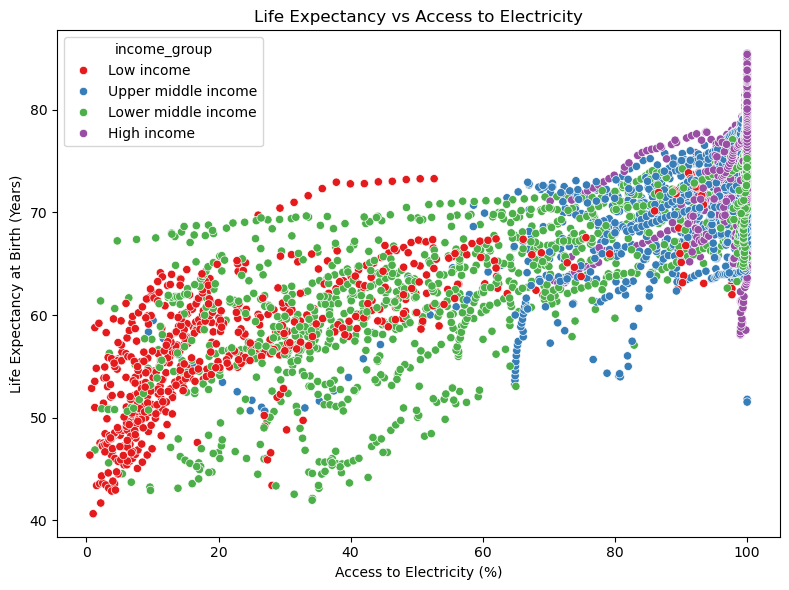

In [29]:
# Scatter plot: Life Expectancy vs Access to Electricity => Countries with higher access to electricity tend to have higher life expectancy.
plt.figure(figsize=(8,6))
sns.scatterplot(data=world_bank, x='access_to_electricity', y='life_expectancy_at_birth', hue='income_group', palette='Set1')
plt.title('Life Expectancy vs Access to Electricity')
plt.xlabel('Access to Electricity (%)')
plt.ylabel('Life Expectancy at Birth (Years)')
plt.tight_layout()
plt.show()

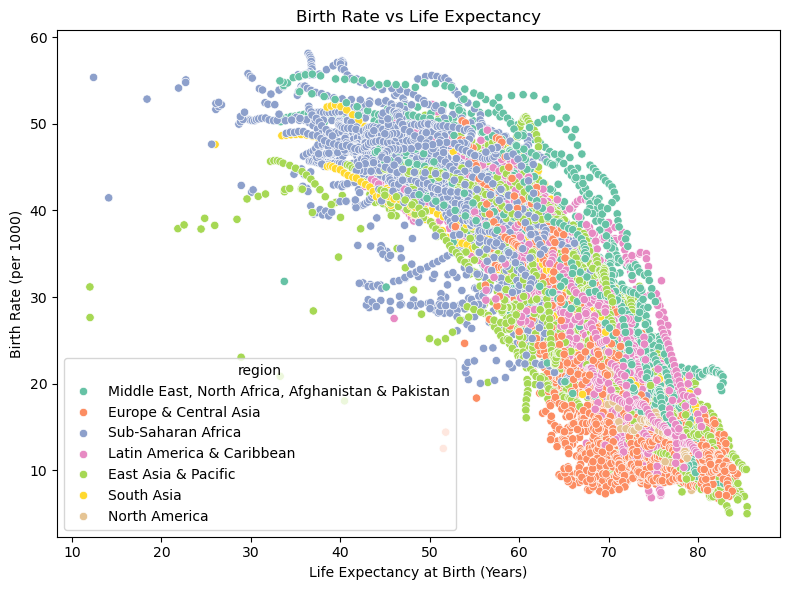

In [30]:
# Scatter plot: Birth Rate vs Life Expectancy
# There is a clear negative correlation: countries with higher life expectancy have lower birth rates.
plt.figure(figsize=(8,6))
sns.scatterplot(data=world_bank, x='life_expectancy_at_birth', y='birth_rate', hue='region', palette='Set2')
plt.title('Birth Rate vs Life Expectancy')
plt.xlabel('Life Expectancy at Birth (Years)')
plt.ylabel('Birth Rate (per 1000)')
plt.tight_layout()
plt.show()

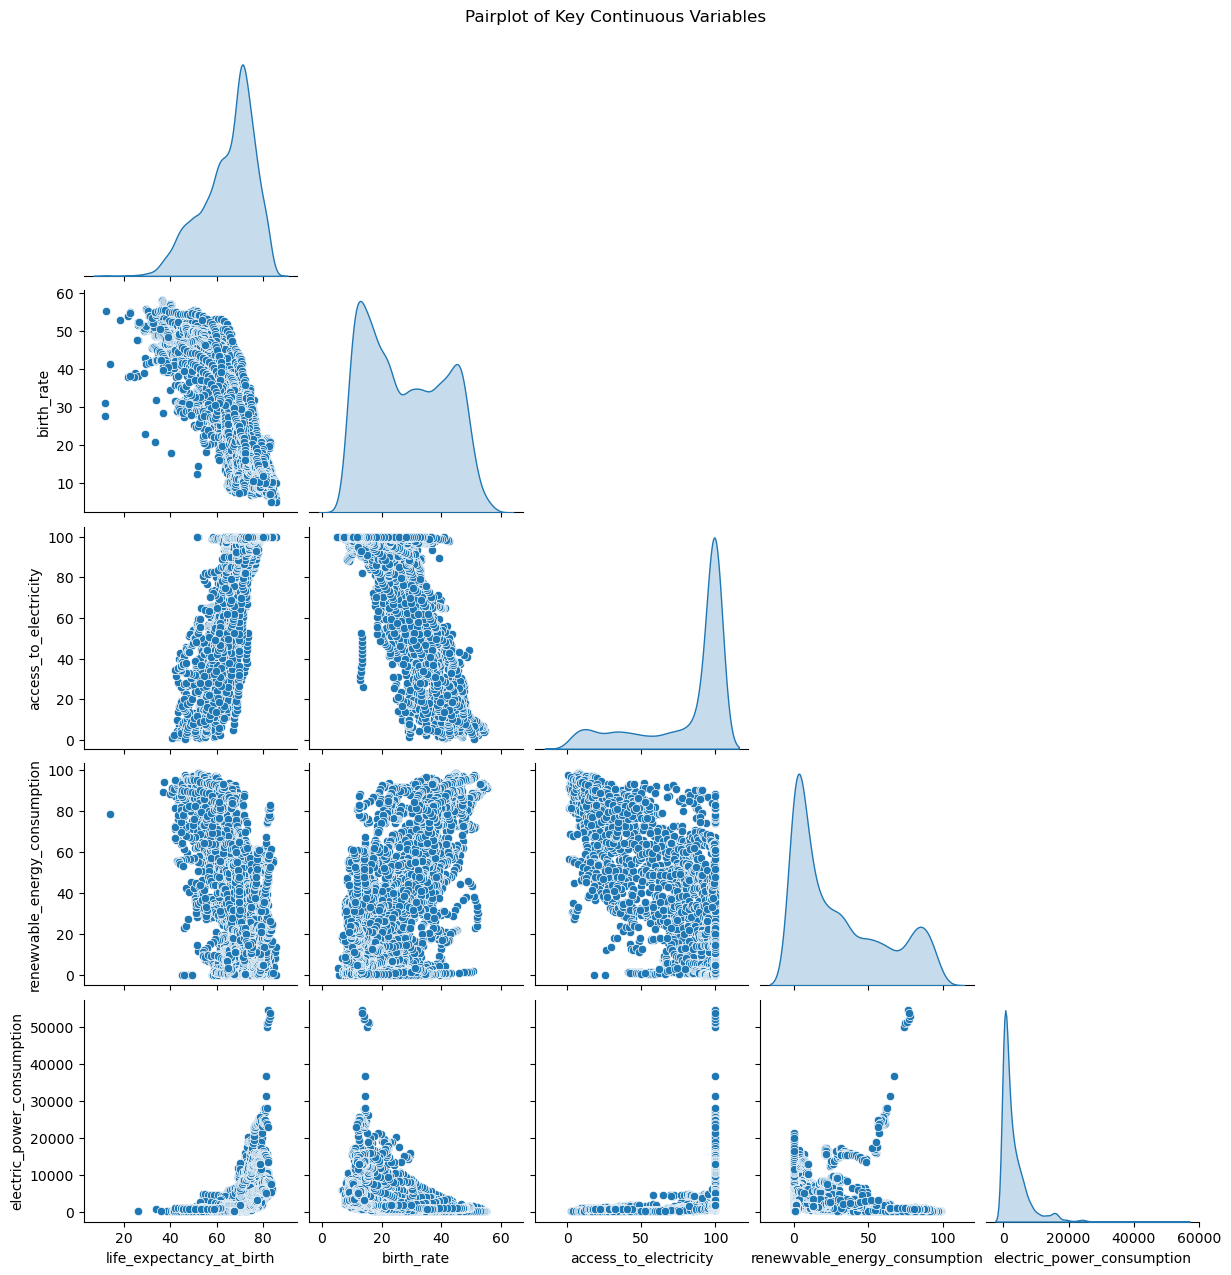

In [31]:
# Pairplot for selected key variables
selected_vars = ['life_expectancy_at_birth', 'birth_rate', 'access_to_electricity', 
                 'renewvable_energy_consumption', 'electric_power_consumption']
sns.pairplot(world_bank[selected_vars], kind='scatter', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Key Continuous Variables', y=1.02)
plt.show()

# The pairplot provides a compact view of relationships between several key variables.
# Diagonal plots show distributions; off-diagonal scatterplots show trends.
# For example, life expectancy vs birth rate is negative, while life expectancy vs electricity access is positive.

In [ ]:
# ANOVA

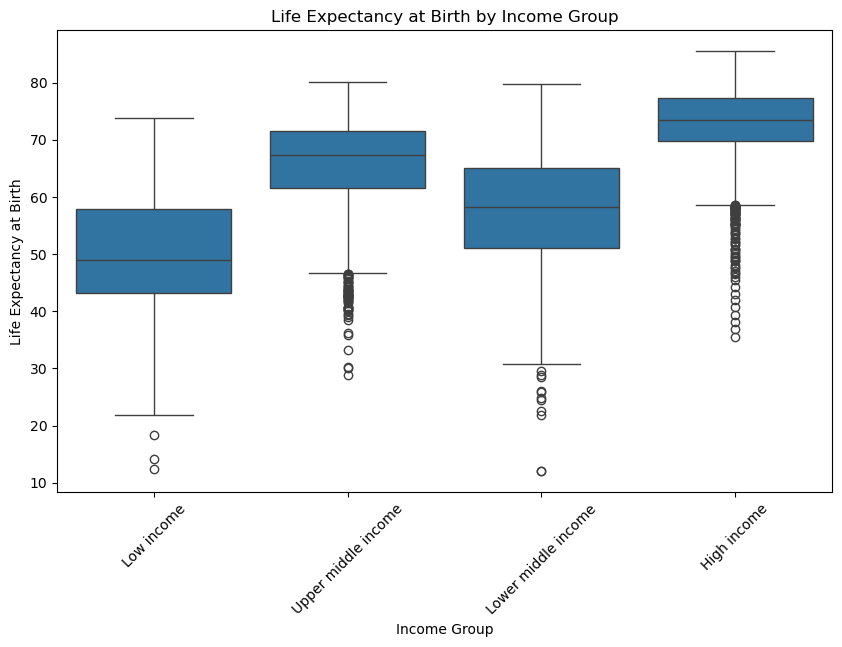

In [32]:
# Boxplot – Visualizing Group Differences
plt.figure(figsize=(10, 6))
sns.boxplot(data=world_bank, x="income_group", y="life_expectancy_at_birth")
plt.title("Life Expectancy at Birth by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Life Expectancy at Birth")
plt.xticks(rotation=45)
plt.show()

In [33]:
# Check assumptions for ANOVA
# Equal sample sizes of groups
groups_sizes_income = world_bank['income_group'].value_counts()
print("Groups Sizes:\n", groups_sizes_income)

Groups Sizes:
 income_group
High income            4679
Upper middle income    3286
Lower middle income    2884
Low income             1488
Name: count, dtype: int64


In [34]:
print("Normality test per group (Shapiro–Wilk):\n")
for group in world_bank["income_group"].unique():
    data = world_bank[world_bank["income_group"] == group]["life_expectancy_at_birth"]
    stat, p = shapiro(data)
    print(f"{group}: W={stat:.3f}, p={p:.3f}")

Normality test per group (Shapiro–Wilk):

Low income: W=0.989, p=0.000
Upper middle income: W=0.948, p=0.000
Lower middle income: W=0.988, p=0.000
High income: W=0.957, p=0.000


In [35]:
# Homogeneity of Variances (Levene test)
print("\nLevene Test for Homogeneity of Variances:")
stat, p = levene(*[world_bank[world_bank["income_group"] == group]["life_expectancy_at_birth"]
                   for group in world_bank["income_group"].unique()])
print(f"Levene stat={stat:.3f}, p={p:.3f}")


Levene Test for Homogeneity of Variances:
Levene stat=336.239, p=0.000


In [36]:
# Run ANOVA
model = ols("life_expectancy_at_birth ~ C(income_group)", data=world_bank).fit()
anova_table = sm.stats.anova_lm(model, typ=2)   # typ=2 is fine even for unequal N
print("\nANOVA Table:")
print(anova_table)


ANOVA Table:
                        sum_sq       df            F  PR(>F)
C(income_group)  790690.028043      3.0  4196.991473     0.0
Residual         774489.709111  12333.0          NaN     NaN


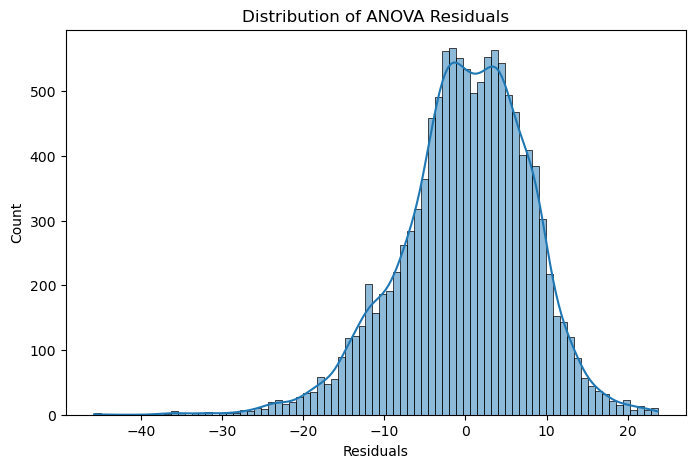

In [37]:
# Inspect Residuals
# Residual Plot
plt.figure(figsize=(8,5))
sns.histplot(model.resid, kde=True)
plt.title("Distribution of ANOVA Residuals")
plt.xlabel("Residuals")
plt.show()

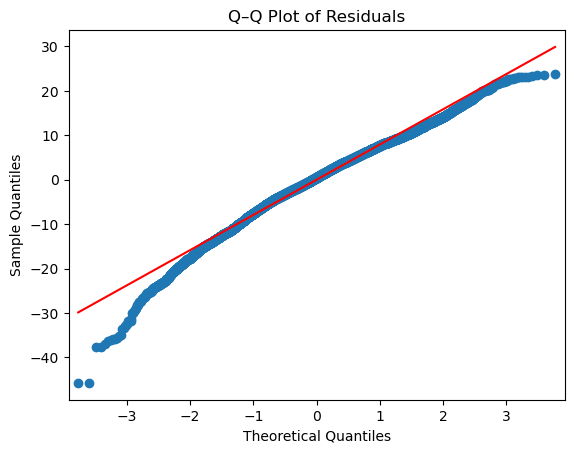

In [38]:
# Q–Q plot of residuals
sm.qqplot(model.resid, line="s")
plt.title("Q–Q Plot of Residuals")
plt.show()

In [39]:
# Post-hoc Test (Tukey HSD)
tukey = pairwise_tukeyhsd(
    endog=world_bank["life_expectancy_at_birth"],
    groups=world_bank["income_group"],
    alpha=0.05
)

print("\nTukey HSD Post-Hoc Results:")
print(tukey)


Tukey HSD Post-Hoc Results:
              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj  lower    upper   reject
-------------------------------------------------------------------------------
        High income          Low income   -22.96   0.0  -23.566  -22.354   True
        High income Lower middle income -15.3906   0.0 -15.8726 -14.9086   True
        High income Upper middle income   -7.259   0.0  -7.7225  -6.7956   True
         Low income Lower middle income   7.5694   0.0   6.9195   8.2193   True
         Low income Upper middle income   15.701   0.0  15.0648  16.3372   True
Lower middle income Upper middle income   8.1316   0.0    7.612   8.6511   True
-------------------------------------------------------------------------------


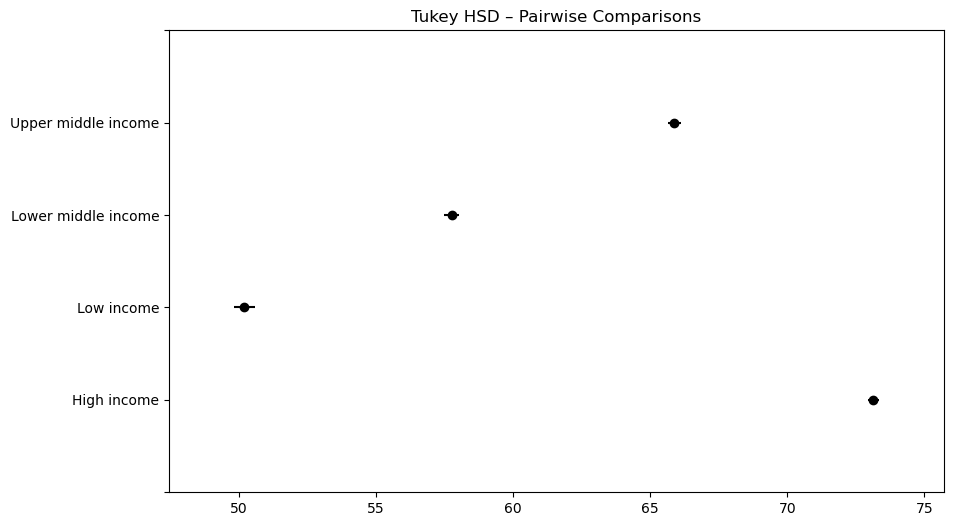

In [40]:
# Plot
tukey.plot_simultaneous(figsize=(10, 6))
plt.title("Tukey HSD – Pairwise Comparisons")
plt.show()

In [ ]:
# Environmental sustainability : CO2